## Autoencoder
An autoencoder is an unsupervised learning technique for neural networks that learns efficient data representations (encoding) by training the network to ignore signal "noise." Autoencoders can be used for image denoising, image compression, and, in some cases, even generation of image data.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist


In [3]:
(x_train,_ ), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:

# normalize the image data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
# reshape in the input data for the model
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

In [5]:
# Add noise to the image
noise_factor = 0.6
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
# clip the values in the range of 0-1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image plt.imshow(x_test [index].reshape (28,28)) plt.gray()

In [6]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image plt.imshow(x_test_noisy [index].reshape(28,28))
plt.gray()

<Figure size 640x480 with 0 Axes>

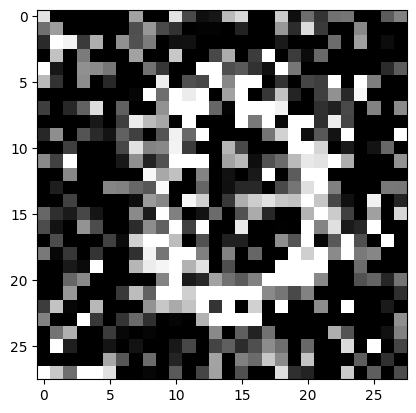

In [7]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test_noisy [index].reshape(28,28))
plt.gray()

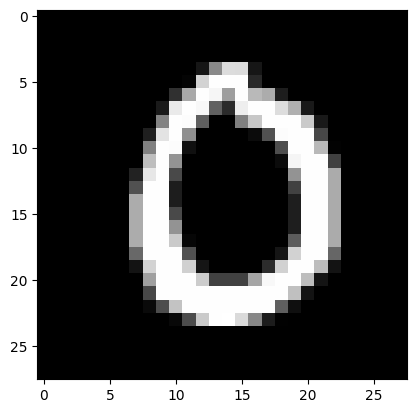

In [8]:
plt.imshow(x_test[index].reshape (28,28))
plt.gray()

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D

# Model Creation
model = Sequential([
    # Encoder network
    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D(2, padding='same'),
    Conv2D(16, 3, activation='relu', padding='same'),
    MaxPooling2D(2, padding='same'),
    # Decoder network
    Conv2D(16, 3, activation='relu', padding='same'),
    UpSampling2D(2),
    Conv2D(32, 3, activation='relu', padding='same'),
    UpSampling2D(2),
    # Output layer
    Conv2D(1, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          2320      
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 16)        0

In [10]:
# Train the model
model.fit(x_train_noisy, x_train, epochs=10, batch_size=256, validation_data=(x_test_noisy, x_test))


Epoch 1/10
235/235 [==============================] - 9s 13ms/step - loss: 0.2434 - val_loss: 0.1532
Epoch 2/10
235/235 [==============================] - 2s 9ms/step - loss: 0.1455 - val_loss: 0.1391
Epoch 3/10
235/235 [==============================] - 2s 9ms/step - loss: 0.1367 - val_loss: 0.1319
Epoch 4/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1316 - val_loss: 0.1288
Epoch 5/10
235/235 [==============================] - 2s 11ms/step - loss: 0.1281 - val_loss: 0.1250
Epoch 6/10
235/235 [==============================] - 2s 9ms/step - loss: 0.1253 - val_loss: 0.1226
Epoch 7/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1234 - val_loss: 0.1213
Epoch 8/10
235/235 [==============================] - 2s 9ms/step - loss: 0.1217 - val_loss: 0.1195
Epoch 9/10
235/235 [==============================] - 2s 9ms/step - loss: 0.1205 - val_loss: 0.1185
Epoch 10/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1194 - val_loss: 0

In [11]:
#Visualize the Results
# predict the results from model (get denoising images)
pred= model.predict(x_test_noisy)

313/313 [==============================] - 1s 2ms/step


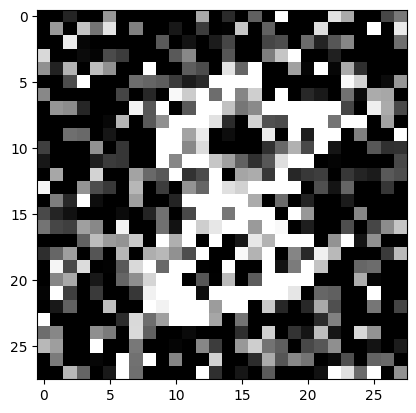

In [12]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test_noisy [index].reshape(28,28))
plt.gray()

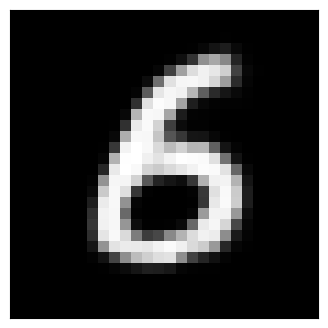

In [13]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy [index].reshape (28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display denoising image ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape (28,28))
plt.gray()
ax.get_xaxis().set_visible (False)
ax.get_yaxis().set_visible (False)
plt.show()

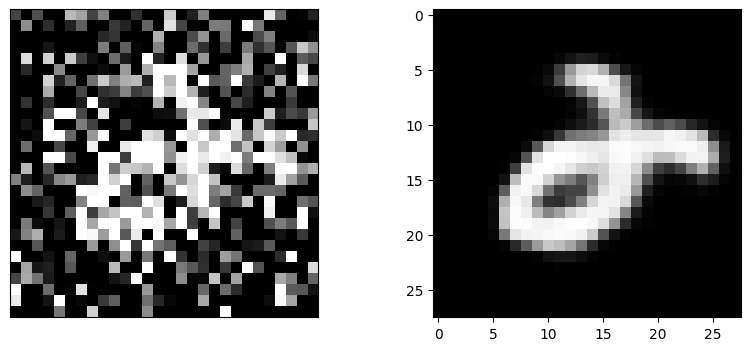

In [14]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy [index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible (False)
ax.get_yaxis().set_visible (False)
# display denoising image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred [index].reshape (28,28))

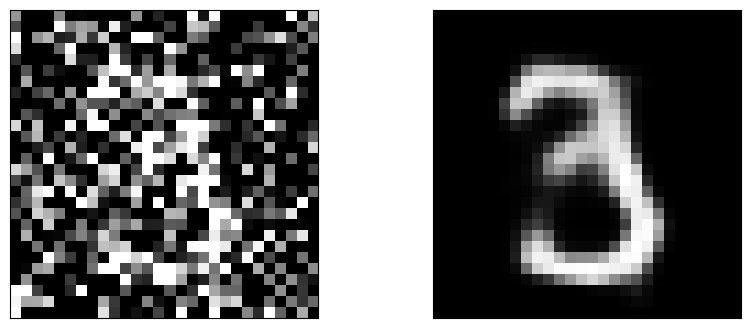

In [15]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display denoising image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()